# k-Nearest Neighbors


**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using [SCLCData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv)


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
data.shape

(569, 32)

In [4]:
#Check the frequency of B and M
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
#Checking the missing values
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
#Split the dataset into input and output--> Train and test
#Train--> Building the model
#Test --> How wellthe model has learnt(Generaize an unseen data)

In [7]:
#Preparing Input and Output
#Droping the id and diagnosis column
X = data.drop(['id', 'diagnosis'],axis = 1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [8]:
#Accessing the Output column:
y = data.diagnosis
y

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [9]:
#Preparing the Training and Testing data
#We are storing 70% of the data(569 rows) into training and the remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [ ]:
#Before splitting if you apply standardization --> you are considering whole 
##you are including test data also into training data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

In [13]:
#Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for testing data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.767981,-0.055433,-0.795918,-0.721932,-0.589333,-0.996232,-0.780212,-0.661564,0.810759,-0.417646,...,-0.785433,0.137175,-0.806874,-0.716765,-0.854530,-0.972772,-0.923478,-0.752143,0.726302,-0.720284
1,-0.116925,-0.731688,-0.158591,-0.209416,-0.875377,-0.728226,-0.760262,-0.697520,0.281483,-0.839423,...,-0.273344,-0.865993,-0.216452,-0.348722,-0.911689,-0.222689,-0.624656,-0.633669,0.824098,-0.330910
2,1.100998,-0.544639,1.047734,0.940735,-0.426476,0.438365,0.300001,0.371772,-0.289084,-0.675726,...,0.870599,-0.559798,0.797992,0.733636,-0.216988,0.157285,0.858626,0.630104,-0.015897,-0.042321
3,-0.922326,1.220340,-0.929322,-0.818221,-0.951934,-0.683493,-0.888348,-1.005166,0.671871,0.132434,...,-0.647087,1.035458,-0.669891,-0.636120,-0.476402,-0.531335,-0.990740,-1.196269,0.363061,-0.372215
4,0.570612,-1.021855,0.510866,0.408905,-0.045084,-0.310914,-0.386171,-0.065263,-0.232778,-0.535625,...,0.319276,-0.972569,0.280965,0.134281,-0.467608,-0.472006,-0.138962,0.016578,-0.127664,-0.710370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.860588,-0.549435,-0.846758,-0.785752,0.842278,-0.447664,-0.697999,-0.583830,-0.311607,0.150131,...,-0.775109,0.187925,-0.787857,-0.695690,0.249076,-0.631995,-0.765225,-0.566574,0.256534,-0.231776
167,-0.086056,-0.798834,-0.053251,-0.195421,0.355099,0.532539,-0.095310,0.071722,-0.506801,0.483424,...,0.083880,-0.756033,0.114565,-0.101734,0.433744,0.741246,0.097336,0.400409,-0.457724,1.100466
168,-0.647311,-0.446318,-0.670242,-0.621444,-0.329040,-0.756086,-0.722523,-0.797030,0.187639,-0.323262,...,-0.560362,-0.141953,-0.607491,-0.537882,-0.300528,-0.469339,-0.572761,-0.880137,-0.125917,-0.099598
169,2.144933,0.448162,2.259753,2.343085,-0.110505,1.868645,1.704113,1.543105,-0.285331,-0.065182,...,2.483269,0.482278,2.658104,2.635688,-0.177417,1.529859,1.622939,1.092515,-0.031614,0.306298


In [ ]:
#testing the data based on training data

In [20]:
#Model Building :
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')

#Apply the knn object on the dataset(Traing Phase)
knn.fit(scaled_X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
# Prediction on the data
#predict function--> gives the predicted values
#Syntax: objectName.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [22]:
#Check the Accuracy, classifivation report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       257
           M       1.00      0.96      0.98       141

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



In [26]:
#Checking for optimum k-value
#Build the model with multiple k valuess--> error
from sklearn.metrics import accuracy_score
scores = []
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.9181286549707602,
 0.9473684210526315,
 0.9590643274853801,
 0.9415204678362573,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9532163742690059,
 0.9590643274853801,
 0.9532163742690059,
 0.9532163742690059,
 0.9415204678362573,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9473684210526315]

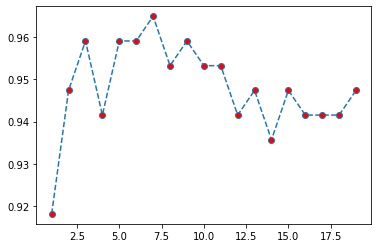

In [31]:
#Plot of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor = 'r', linestyle='--')

In [33]:
#Optimum k value as 7
final_model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [34]:
#Prediction on training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

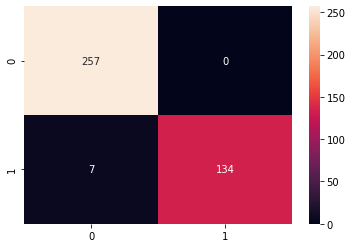

In [37]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot = True, fmt = 'd')
#d--> integer formatting

In [38]:
#Classification report:
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [39]:
#Prediction on test data
final_test_pred = final_model.predict(scaled_X_test) #y_test
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

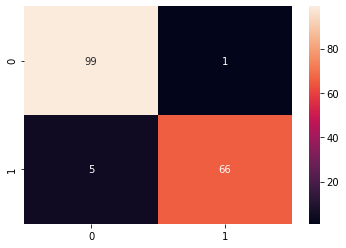

In [40]:
#Compare actual values of test data(y_test) and final_test_pred(model predicted values)
# Confuison_matrix(actualValues, predictedValues)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot = True, fmt = 'd')

In [42]:
#Classifcation Report for test data:
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97       100
           M       0.99      0.93      0.96        71

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

